# Introduction to Digital Signal Processing (DSP) for Embedded AI

**Welcome!** If you've ever wondered how a smart device cleans up noisy sensor data, how a phone isolates your voice from background noise, or how a car's computer tracks a pedestrian, you're in the right place. This is the world of Digital Signal Processing (DSP), a fundamental tool in modern AI and robotics.

**Where are we in the course?**  
We are moving from high-level AI concepts, like computer vision, to the essential engineering that makes them work on real hardware. DSP is the bridge between raw data and intelligent decisions.

**Why does this matter for AI?**  
Real-world data is messy. Signals—whether from a heart rate monitor, a microphone, or a camera—are often corrupted by noise. DSP provides the theory and tools to:
- **Clean and enhance** signals.
- **Extract meaningful features** from data.
- **Fuse information** from multiple sources.
- **Prepare data** for machine learning models.

**Our journey today:**  
1.  **What is a Signal?** — Building intuition with 1D and 2D examples.
2.  **What is DSP?** — Understanding the core operations.
3.  **Filtering in 1D** — Smoothing noisy time-series data.
4.  **Filtering in 2D** — Applying the same ideas to images.
5.  **A Glimpse into the Frequency Domain** — Introducing the Fourier Transform.
6.  **Why This Matters for AI** — Connecting DSP to tracking, CV, and sensor fusion.

## A Throwback to the Dawn of Embedded AI

Before "Embedded AI" was a buzzword, pioneers were already building systems to process real-world signals on the go. This photo from the mid-1990s shows MIT students from the "Wearable Computing Project." The person on the far left, **Steve Mann (PhD '97)**, is often called the "father of wearable computing."

![MIT Wearable Computing Project in the mid-1990s](https://alum.mit.edu/sites/default/files/images/Slice_23_09_13_web.jpg)
*Steve Mann (far left) and fellow MIT students in the mid-1990s. [Photo courtesy of Steve Mann via MIT Alumni Association](https://alum.mit.edu/slice/hdr-pioneer-looks-future-wearable-tech).*

Their gear was bulky, and the processing power was a fraction of what we have today. But the core challenge they faced is the same one we tackle in this course: **how do you take messy, real-world signals (from cameras, microphones, etc.) and turn them into useful information on a portable device?**

The answer, then and now, lies in Digital Signal Processing. The techniques you'll learn in this lecture are the direct descendants of the methods these pioneers used to make sense of a noisy world.

### 🔍 DSP Detective: Spot the Signal Processing!

**Right now, as you read this:**
- Your **WiFi** is using DSP to decode this webpage 📶
- Your **laptop fan** controller uses DSP to manage temperature 🌡️  
- If music is playing, **audio DSP** is removing noise and enhancing bass 🎵
- Your **phone's camera** used DSP to auto-focus when you last took a photo 📸
- **Bluetooth** headphones? DSP is compressing and decompressing audio in real-time 🎧

**The challenge:** DSP is so good at its job that it's invisible. You only notice it when it's *not* working (fuzzy TV signal, choppy video call, etc.). Today we're pulling back the curtain on this hidden digital magic! ✨

## 1. What is a Signal?

At its core, a **signal** is simply a sequence of measurements. We can categorize them by their "domain":

-   **Time-Domain (1D):** A series of values recorded over time.
    -   Audio waveform from a microphone.
    -   Temperature readings from a weather sensor.
    -   Stock prices over a year.
-   **Spatial-Domain (2D):** A matrix of values representing an area.
    -   Pixel intensities in a grayscale image.
    -   A heat map of a room.

Let's start with a simple 1D example: a clean sine wave versus a noisy version of it. This is a classic scenario in electronics and sensor readings.


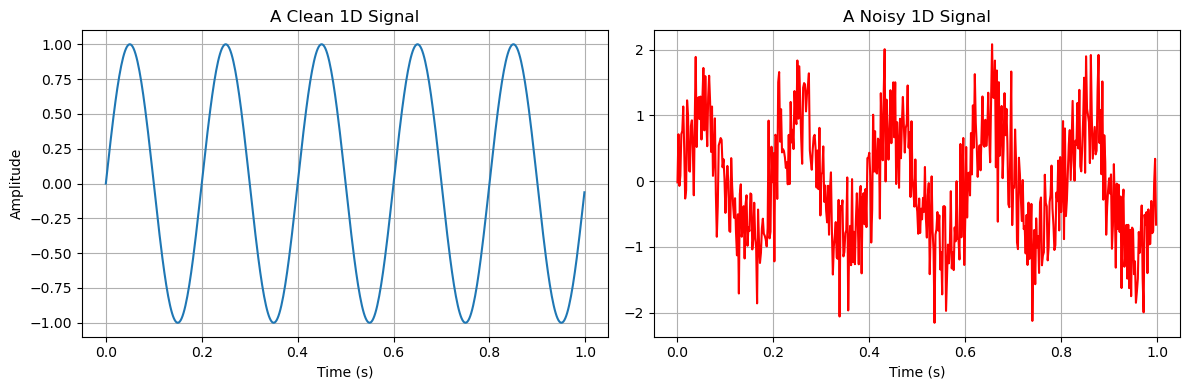

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time axis
t = np.linspace(0, 1, 500, endpoint=False)

# Create a clean 5 Hz sine wave
clean_signal = np.sin(2 * np.pi * 5 * t)

# Add some random noise to simulate a real-world sensor reading
noise = 0.5 * np.random.randn(len(t))
noisy_signal = clean_signal + noise

# Plotting for comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(t, clean_signal)
plt.title('A Clean 1D Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, noisy_signal, color='r')
plt.title('A Noisy 1D Signal')
plt.xlabel('Time (s)')
plt.grid(True)

plt.tight_layout()
plt.show()


## 2. What is Digital Signal Processing (DSP)?

DSP is the practice of using algorithms to **transform** signals to achieve a specific goal. Think of it as "signal surgery."

**Common Goals:**
-   **Filtering:** Removing unwanted components, like noise.
-   **Feature Extraction:** Identifying important patterns or events.
-   **Transformation:** Changing the signal's representation (e.g., from time to frequency).
-   **Fusion:** Combining multiple signals to get a more accurate view of the world.

A typical DSP pipeline looks something like this:

![A diagram showing the DSP pipeline: a noisy analog signal enters an Analog-to-Digital Converter (ADC), becomes a digital signal, is processed by a DSP algorithm (e.g., filtering), and results in a clean digital signal.](https://media.geeksforgeeks.org/wp-content/uploads/20240403130126/Untitled-Diagram---2024-04-03T130110286.webp)
A diagram showing the DSP pipeline: a noisy analog signal enters an Analog-to-Digital Converter (ADC), becomes a digital signal, is processed by a DSP algorithm (e.g., filtering), and results in a clean digital signal.
Source: https://www.geeksforgeeks.org/electronics-engineering/what-is-digital-signal-processing/

### Hardware for Signal Processing: CPU vs. GPU vs. DSP

While the algorithms are crucial, the hardware they run on is just as important, especially in embedded systems where power and speed are critical. Let's compare the three main types of processors.

| Feature | CPU (Central Processing Unit) | GPU (Graphics Processing Unit) | DSP (Digital Signal Processor) / AI Accelerator |
| :--- | :--- | :--- | :--- |
| **Primary Role** | General-purpose computing, control tasks | Massively parallel computation | Real-time, repetitive math operations |
| **Architecture** | A few powerful, complex cores | Thousands of simpler, specialized cores | Specialized for math-intensive instructions (MACs) |
| **Typical Applications** | Operating systems, application software, system control | 3D graphics rendering, scientific computing, AI model **training** | Real-time signal processing, AI model **inference** |
| **Example Use Cases** | Running a web browser, managing a file system, user interface logic | Training a large language model, video game graphics, weather simulation | Noise cancellation in headphones, object detection on a smart camera, cell phone signal processing |
| **Power Efficiency** | Moderate | High power consumption | **Very high** for its specialized tasks |
| **Real-time** | Not typically deterministic | Not deterministic | **Highly deterministic** with low, predictable latency |

### The Blurring Lines: DSPs and Modern AI Chips

You might notice that the strengths of a DSP—performing repetitive math operations like Multiply-Accumulate (MAC) with extreme efficiency—sound a lot like what a neural network does.

And you'd be right. **Modern AI inference chips** (like Google's TPU, Apple's Neural Engine, or Qualcomm's Hexagon Processor) are essentially highly evolved, massively parallel DSPs. Their architecture is optimized for the core operation of AI: vast numbers of matrix multiplications, which are just large sets of MACs.

This is why understanding DSP is so relevant to embedded AI. The hardware philosophy is the same: build a chip that does one thing (repetitive math) incredibly well and with minimal power.

### Traditional DSP Use Cases
Before the AI boom, DSPs were (and still are) the silent workhorses in countless devices:
-   **Telecommunications:** Modems, cell phone baseband processing.
-   **Audio:** Audio effects, digital synthesizers, noise cancellation in headphones.
-   **Medical Imaging:** MRI and CT scan reconstruction.
-   **Control Systems:** Hard drive controllers, engine management systems.

## 3. Filtering: The Cornerstone of DSP

Filtering is the most common and fundamental DSP task. A **filter** is an algorithm that takes a signal as input and produces a modified signal as output.

### Key Types of Filters:

1.  **Smoothing Filters (Low-Pass):**
    -   **Goal:** Reduce noise and reveal the underlying trend.
    -   **How:** By averaging nearby data points. The "moving average" is a classic example.
    -   **Effect:** Blurs the signal, removing sharp, high-frequency changes.

2.  **Sharpening Filters (High-Pass):**
    -   **Goal:** Emphasize edges and rapid changes.
    -   **How:** By subtracting the surrounding values from the central point.
    -   **Effect:** Highlights details, often used in image edge detection.

3.  **Adaptive Filters (e.g., Kalman Filter):**
    -   **Goal:** Adjust its behavior in real-time based on the signal's statistics.
    -   **How:** Uses a predictive model to estimate the "true" state and updates its prediction based on new measurements.
    -   **Effect:** Excellent for tracking moving objects or handling systems where noise characteristics change over time.

### 1D Demo: Smoothing with a Moving Average

Let's try to recover our clean signal from the noisy one using a simple moving average filter. The core idea is to replace each data point with the average of itself and its neighbors. This is achieved through an operation called **convolution**.

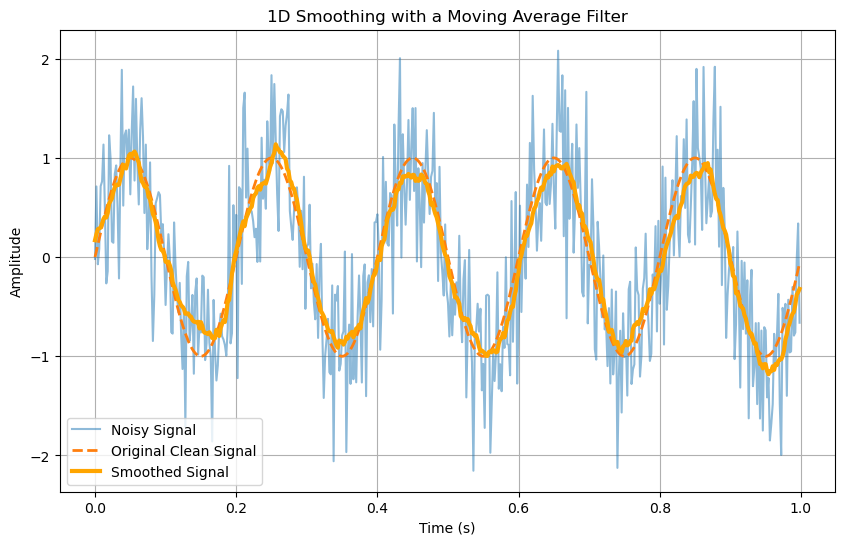

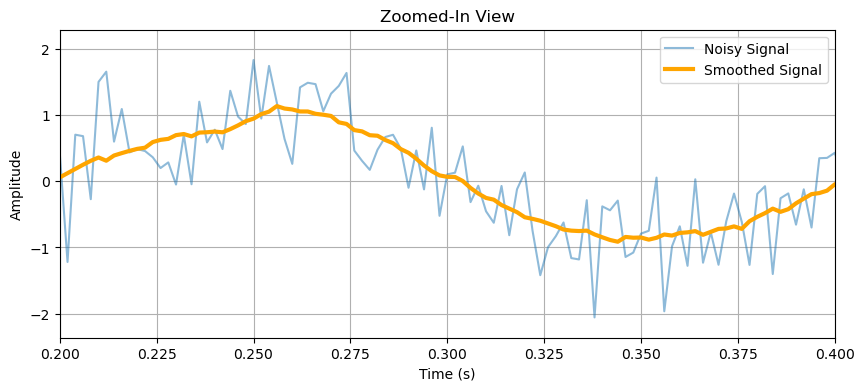

In [ ]:
# Define the moving average filter "kernel" or "window"
# This is a window of 20 points, where each point has equal weight (1/20)
window_size = 20
moving_avg_filter = np.ones(window_size) / window_size

# Apply the filter using convolution
# 'mode=same' ensures the output signal has the same length as the input
smoothed_signal = np.convolve(noisy_signal, moving_avg_filter, mode='same')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, clean_signal, label='Original Clean Signal', linestyle='--', linewidth=2)
plt.plot(t, smoothed_signal, label='Smoothed Signal', linewidth=3, color='orange')
plt.title('1D Smoothing with a Moving Average Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Zoom in to see the effect more clearly
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, smoothed_signal, label='Smoothed Signal', linewidth=3, color='orange')
plt.title('Zoomed-In View')
plt.xlim(0.2, 0.4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### What about 2D Signals (Images)?

The exact same principle applies! A 2D filter (often called a "kernel" in computer vision) moves across an image to modify pixel values.

-   A **blurring** filter averages a pixel with its neighbors, just like our 1D moving average. This is a **low-pass** filter.
-   A **sharpening** or **edge-detection** filter emphasizes differences between a pixel and its neighbors. This is a **high-pass** filter.

Let's try blurring an image. We'll use OpenCV, a popular library for computer vision.


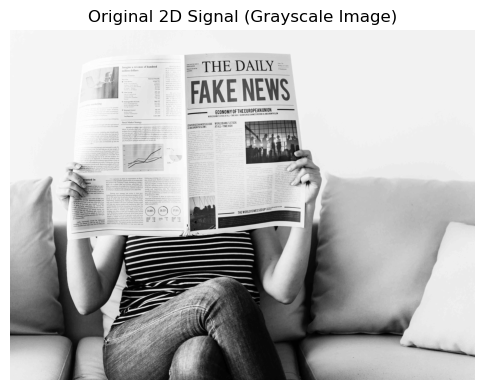

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load an image from the workspace
try:
    img = cv2.imread('sample.jpg')
    # Convert from BGR (OpenCV's default) to RGB for plotting
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Convert to grayscale for easier processing
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
except Exception as e:
    print(f"Error loading image: {e}")
    print("Please ensure 'sample.jpg' is in the same directory as the notebook.")
    img_gray = np.zeros((200, 200), dtype=np.uint8) # Placeholder

# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.title('Original 2D Signal (Grayscale Image)')
plt.axis('off')
plt.show()


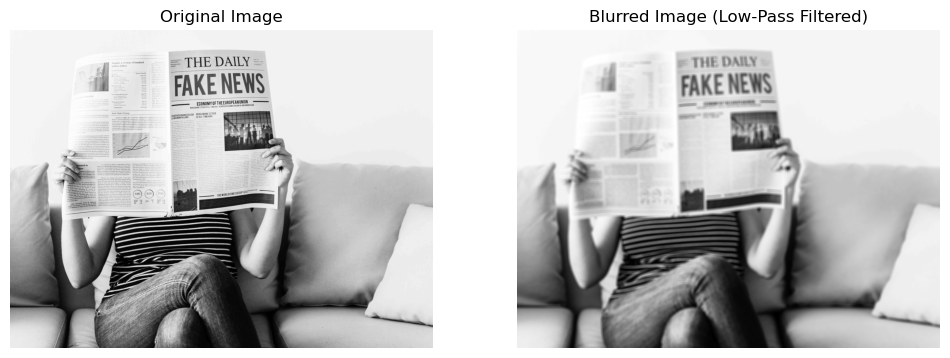

In [ ]:
# Create a 2D blurring kernel (similar to our 1D moving average)
# A 10x10 kernel of ones, normalized
kernel_size = 30
blur_kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

# Apply the kernel using OpenCV's filter2D function
# This is 2D convolution!
blurred_img = cv2.filter2D(img_gray, -1, blur_kernel)

# Display the original and blurred images side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image (Low-Pass Filtered)')
plt.axis('off')

plt.show()


## 4. A Glimpse into the Frequency Domain

So far, we've worked in the **time domain** (for 1D signals) and the **spatial domain** (for 2D signals). We look at the signal's value at each point in time or space.

But there's another way to look at a signal: the **frequency domain**.

The **Fourier Transform** is a powerful mathematical tool that re-expresses a signal as a combination of simple sine waves of different frequencies and amplitudes.

### 🕰️ Historical Fun Fact: Fourier was *way* ahead of his time!

**Joseph Fourier** (1768-1830) developed his theory while studying... heat! 🔥 He was trying to understand how heat flows through objects. His colleagues thought his ideas were so bizarre that they rejected his paper for **13 years**.

Little did they know that this "useless" math would become the backbone of:
- **Every MP3 song** you've ever listened to 🎵
- **Every JPEG image** on the internet 📸  
- **Every WiFi signal** in your home 📶
- **And yes, every Instagram filter** that makes you look good ✨

**The FFT Algorithm:** In 1965, Cooley and Tukey created the "Fast Fourier Transform" (FFT), making Fourier's ideas computationally practical. This single algorithm helped launch the digital revolution!

**Why is this useful?**
-   It tells us **"what frequencies are present"** in the signal.
-   Noise often lives in high-frequency regions, so we can easily remove it in the frequency domain.
-   It's the foundation for many compression algorithms (like JPEG and MP3).

Let's visualize the frequency content of our clean and noisy signals.

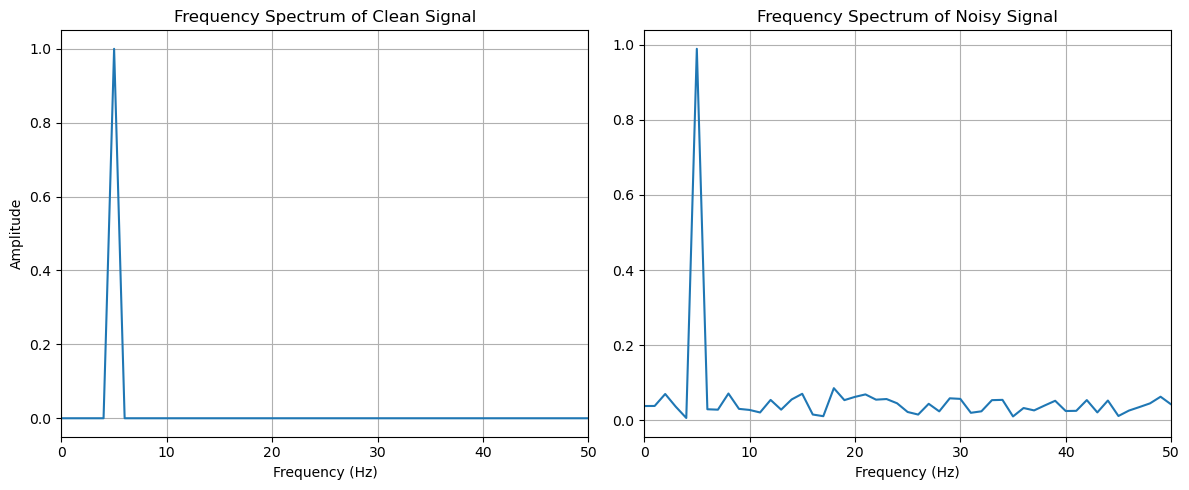

Notice the single, sharp peak at 5 Hz for the clean signal.
The noisy signal has that same peak, but also has many other smaller frequency components across the spectrum. This is the noise!


In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Number of sample points
N = len(clean_signal)
# Sample spacing (1 / sample_rate)
T = 1.0 / 500.0

# Compute the FFT of the clean signal
yf_clean = fft(clean_signal)
xf = fftfreq(N, T)[:N//2]

# Compute the FFT of the noisy signal
yf_noisy = fft(noisy_signal)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(xf, 2.0/N * np.abs(yf_clean[0:N//2]))
plt.title('Frequency Spectrum of Clean Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, 50) # Zoom in on the relevant frequency range

plt.subplot(1, 2, 2)
plt.plot(xf, 2.0/N * np.abs(yf_noisy[0:N//2]))
plt.title('Frequency Spectrum of Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

print("Notice the single, sharp peak at 5 Hz for the clean signal.")
print("The noisy signal has that same peak, but also has many other smaller frequency components across the spectrum. This is the noise!")


## 5. Why This is Critical for AI and Computer Vision

The concepts of filtering and frequency analysis are not just academic—they are at the heart of countless AI applications.

-   **Computer Vision:**
    -   **Image Preprocessing:** Blurring (low-pass filtering) to reduce camera noise before feeding an image to a neural network.
    -   **Feature Extraction:** Using edge detection filters (high-pass filtering) like the Sobel or Scharr operator to find object boundaries.
    -   **Object Tracking:** Kalman filters are the industry standard for predicting the position of a moving object (e.g., a pedestrian, a car, a ball) based on a series of noisy measurements from a camera.

-   **Audio & Voice Recognition:**
    -   **Noise Suppression:** Filtering out high-frequency hiss or low-frequency hum from an audio recording.
    -   **Voice Activity Detection:** Analyzing the frequency content to determine if a segment of audio contains speech or just background noise.

-   **Robotics & Autonomous Systems:**
    -   **Sensor Fusion:** A robot might have a camera (vision), an IMU (Inertial Measurement Unit), and LiDAR. A Kalman filter is often used to fuse these different sensor streams into a single, robust estimate of the robot's position and orientation.

-   **Time-Series Analysis:**
    -   **Anomaly Detection:** Identifying unusual patterns in financial data or machine sensor readings by looking for unexpected frequency components.
    -   **Forecasting:** Smoothing time-series data to better model the underlying trend.


### Enhanced 2D Filtering Demo

Let's expand our 2D filtering to show multiple types of filters and their effects. This will help you see how the same convolution operation can create dramatically different results depending on the kernel design.

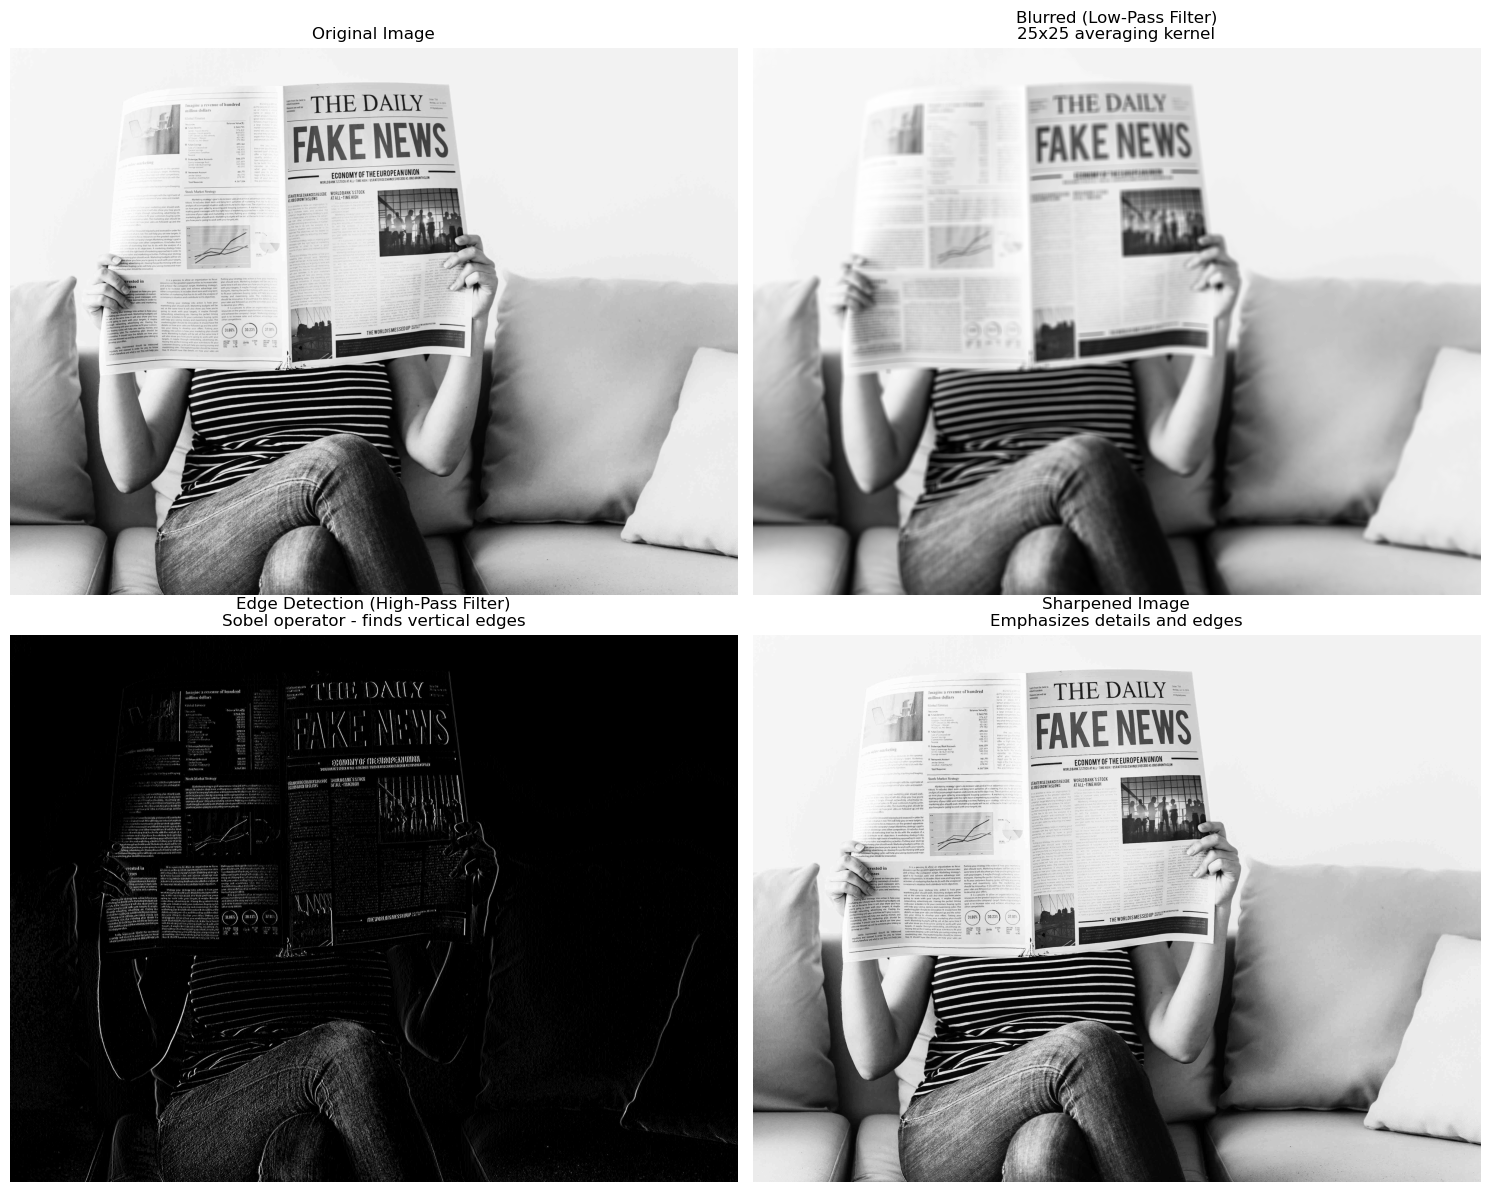

Filter Kernels Visualized:

1. Blur Kernel (5x5 sample):
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]

2. Sobel Vertical Edge Detection Kernel:
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]

3. Sharpen Kernel:
[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]

Notice how:
- Blur kernel: All positive values → averages neighboring pixels
- Edge kernel: Negative and positive values → highlights differences
- Sharpen kernel: Negative edges, large positive center → enhances contrast


In [ ]:
# Let's create multiple 2D filters to show different effects
# 1. Blur filter (Low-pass) - averages neighboring pixels
blur_size = 25
blur_kernel = np.ones((blur_size, blur_size), np.float32) / (blur_size * blur_size)

# 2. Edge detection filter (High-pass) - Sobel operator for vertical edges
sobel_vertical = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]], dtype=np.float32)

# 3. Sharpening filter - emphasizes edges and details
sharpen_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype=np.float32)

# Apply all three filters
blurred_img = cv2.filter2D(img_gray, -1, blur_kernel)
edges_img = cv2.filter2D(img_gray, -1, sobel_vertical)
sharpened_img = cv2.filter2D(img_gray, -1, sharpen_kernel)

# Display all results in a 2x2 grid
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title(f'Blurred (Low-Pass Filter)\n{blur_size}x{blur_size} averaging kernel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges_img, cmap='gray')
plt.title('Edge Detection (High-Pass Filter)\nSobel operator - finds vertical edges')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image\nEmphasizes details and edges')
plt.axis('off')

plt.tight_layout()
plt.show()

# Let's also show what these kernels look like
print("Filter Kernels Visualized:")
print("\n1. Blur Kernel (5x5 sample):")
small_blur = np.ones((5, 5)) / 25
print(small_blur)

print("\n2. Sobel Vertical Edge Detection Kernel:")
print(sobel_vertical)

print("\n3. Sharpen Kernel:")
print(sharpen_kernel)

print("\nNotice how:")
print("- Blur kernel: All positive values → averages neighboring pixels")
print("- Edge kernel: Negative and positive values → highlights differences")
print("- Sharpen kernel: Negative edges, large positive center → enhances contrast")

### Interactive Kernel Designer

Now it's your turn! Let's experiment with designing custom kernels. Try modifying the values in the kernel below and see what happens to the image. This is exactly how computer vision researchers and engineers design new filters for specific tasks.

### 😂 Engineer Humor Break: "It's just convolution!"
There's a famous meme in the AI community: **"Everything is just convolution!"**
- **CNNs?** Convolution with learnable kernels
- **Attention mechanisms?** Basically fancy convolution  
- **Transformers?** Well... okay, those broke the pattern 😅

But seriously, once you understand convolution, you'll see it **everywhere** in computer vision and signal processing!

### 🔬 Cool Fact: Your Eyes Do Convolution Too!
Your **retinal ganglion cells** naturally perform edge detection using center-surround filters that work exactly like our Sobel operators. Evolution figured out convolution millions of years before we did! 👁️

**Some ideas to try:**
- Make all values 0 except the center (value = 1) → What happens?
- Try negative values in the center and positive on the edges
- Create an asymmetric pattern
- Make a horizontal edge detector (hint: rotate the Sobel kernel)

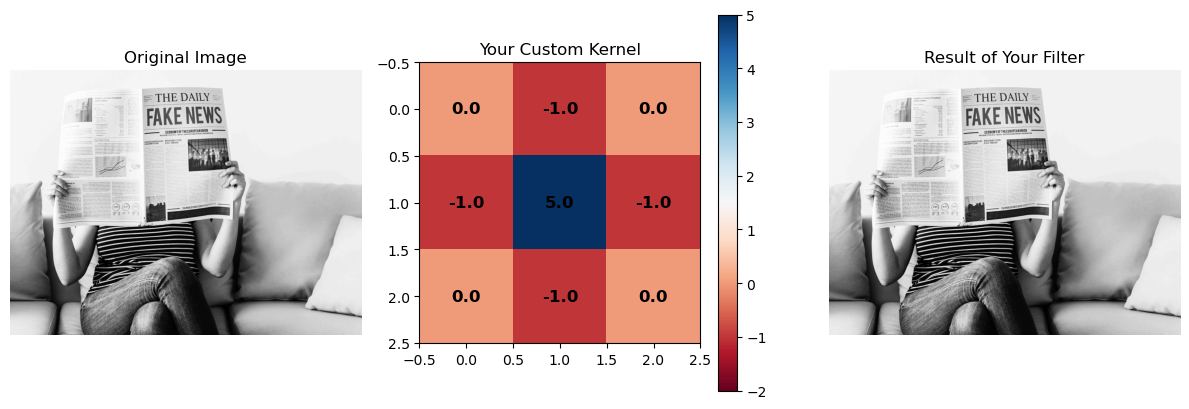

Kernel Properties:
Sum of all values: 1.00
📝 Tip: If sum ≈ 1, brightness is preserved
📝 Tip: If sum ≈ 0, you're detecting changes/edges
📝 Tip: If sum > 1, image gets brighter

🧪 Quick Experiments to Try:
1. Identity filter: [[0,0,0],[0,1,0],[0,0,0]]
2. Horizontal edges: [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
3. Emboss effect: [[-2,-1,0],[-1,1,1],[0,1,2]]
4. Strong blur: [[1,1,1],[1,1,1],[1,1,1]]/9


In [ ]:
# Interactive Kernel Designer - Modify the values below and run the cell!

# Design your own 3x3 kernel here:
# Try different combinations and see what happens!
custom_kernel = np.array([
    [0, -1, 0],    # Top row
    [-1, 5, -1],   # Middle row
    [0, -1, 0]     # Bottom row
], dtype=np.float32)

# Apply your custom kernel
custom_result = cv2.filter2D(img_gray, -1, custom_kernel)

# Display the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
# Visualize the kernel as a heatmap
plt.imshow(custom_kernel, cmap='RdBu', vmin=-2, vmax=5)
plt.title('Your Custom Kernel')
plt.colorbar(shrink=0.8)
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{custom_kernel[i,j]:.1f}',
                ha='center', va='center', fontsize=12, fontweight='bold')

plt.subplot(1, 3, 3)
plt.imshow(custom_result, cmap='gray')
plt.title('Result of Your Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Kernel Properties:")
print(f"Sum of all values: {np.sum(custom_kernel):.2f}")
print("📝 Tip: If sum ≈ 1, brightness is preserved")
print("📝 Tip: If sum ≈ 0, you're detecting changes/edges")
print("📝 Tip: If sum > 1, image gets brighter")

# Quick experiments for students to try:
print("\n🧪 Quick Experiments to Try:")
print("1. Identity filter: [[0,0,0],[0,1,0],[0,0,0]]")
print("2. Horizontal edges: [[-1,-1,-1],[2,2,2],[-1,-1,-1]]")
print("3. Emboss effect: [[-2,-1,0],[-1,1,1],[0,1,2]]")
print("4. Strong blur: [[1,1,1],[1,1,1],[1,1,1]]/9")

## Activity: The AI Chip in Your Pocket

**Objective:** The concepts of specialized, power-efficient hardware for repetitive math aren't just theoretical; they are in the phone you use every day. This activity asks you to do a short research investigation into the AI/ML accelerator inside your own smartphone (or a recent model you are interested in).

**Your Task:**
Write a short summary (2-3 paragraphs) answering the following questions.

### Guiding Questions:

1.  **What phone/System-on-a-Chip (SoC) are you researching?**
    *   *Example: An iPhone 15 with the A17 Pro chip, or a Google Pixel 8 with the Tensor G3 chip.*

2.  **What is the name of its AI/ML accelerator?**
    *   This is often a branded component. For example:
        *   Apple calls it the **Neural Engine**.
        *   Google calls its main processor the **Tensor** chip, which has a built-in TPU (Tensor Processing Unit).
        *   Qualcomm (used in many Android phones) has the **Hexagon Processor** which often includes a Tensor Accelerator.
        *   Samsung has its **NPU** (Neural Processing Unit) in its Exynos chips.

3.  **What are its key advertised capabilities?**
    *   Look for metrics like **TOPS** (Trillions of Operations Per Second). How has this number changed over the last few generations of the chip?
    *   What kind of precision does it use? (e.g., INT8, FP16). Why is this important for power efficiency?

4.  **What specific user-facing features does this chip power?**
    *   Think about features that happen "magically" on your phone. Search for how the AI chip enables things like:
        *   **Computational Photography:** Portrait mode (background blur), Night Sight, image stabilization.
        *   **Real-time Language Translation.**
        *   **Face ID or Fingerprint Recognition.**
        *   **"Live Text"** recognition in images and videos.
        *   **Voice assistants** processing commands locally ("on-device").

5.  **How does its function relate to the DSP concepts we discussed?**
    *   Connect the chip's role back to the ideas of **Multiply-Accumulate (MAC)** operations, **parallelism**, and **power efficiency** for a specialized task. Explain in your own words why a general-purpose CPU would be a poor choice for these features.

### Where to Start Your Search:

*   Search for "[Your Phone Model] teardown" or "[Your Phone's Chip] analysis". Tech sites like AnandTech, Ars Technica, or tech-focused YouTubers often do deep dives.
*   Look at the official marketing pages from Apple, Google, or Qualcomm for your phone's chip. They will highlight the AI features.
*   Search for terms like "Apple A17 Neural Engine," "Google Tensor G3," or "Snapdragon 8 Gen

## Recommended Resources

-   **[Think DSP](https://greenteapress.com/wp/think-dsp/)** by Allen Downey: A fantastic, free, Python-based book that builds intuition.
-   **[The Scientist and Engineer's Guide to Digital Signal Processing](https://www.dspguide.com/)**: A more traditional, in-depth, and highly respected free online book.
-   **OpenCV Documentation:** For practical 2D filtering and computer vision tasks.
-   **[Kalman and Bayesian Filters in Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python)**: The go-to resource for our next topic on adaptive filtering.

### 📱 Pop Culture Connections: DSP in Your Daily Life

Now that you understand the basics, you'll start noticing DSP everywhere:

- **TikTok/Instagram filters?** Real-time convolution on your face! 📱✨
- **Instagram's "enhance" button?** Probably a sharpening kernel we just learned about! 📸
- **Zoom's background blur?** Edge detection + selective blurring in real-time! 💻
- **Spotify's "normalize volume"?** Audio DSP analyzing and adjusting frequency content! 🎵
- **Your car's parking sensors?** DSP processing ultrasonic signals to estimate distance! 🚗
- **Video game graphics?** Massive parallel convolution operations on your GPU! 🎮

**The DSP mindset:** Once you understand that signals are everywhere and can be processed mathematically, you'll never look at technology the same way. Welcome to seeing the Matrix! 🕶️